In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

In [63]:
data_frame_df= pd.read_csv("Data_Marketing_Customer_Analysis_Round3 (3).csv")
data_frame_df 

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


# check if there are highly correlated features and drop them if there are any.

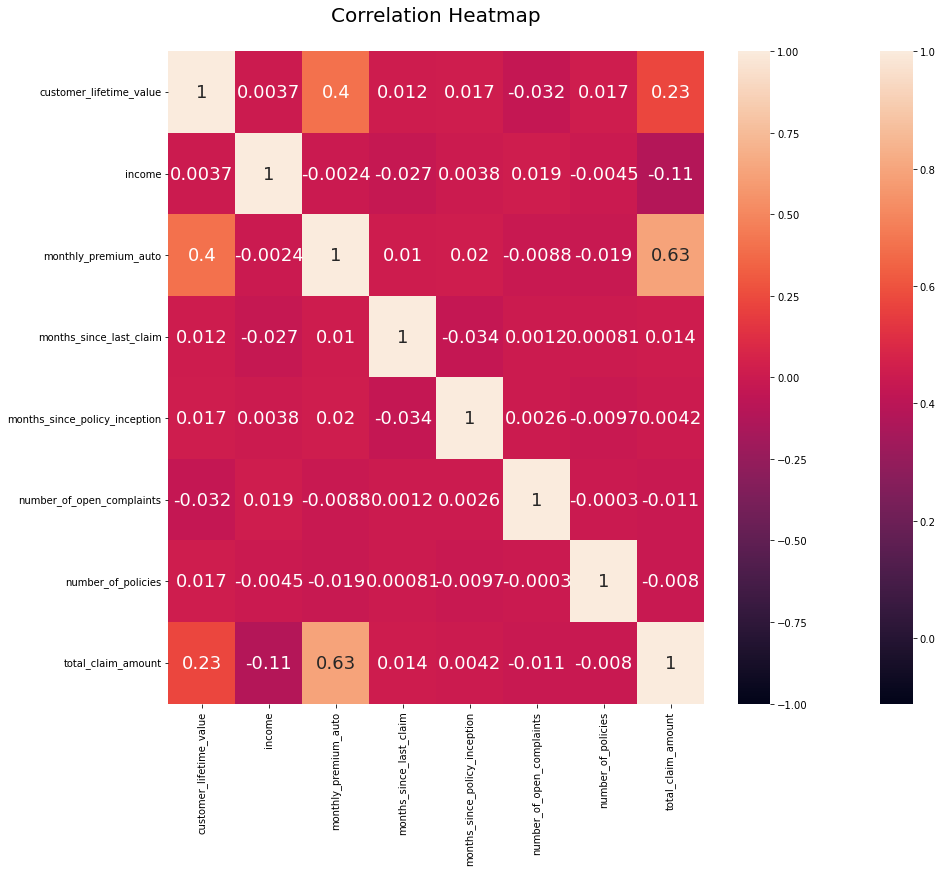

In [64]:
###-Plot the Correlation Heatmap.
plt.figure(figsize=(15,12)) ### FIGURE SIZE

heatmap=sns.heatmap(data_frame_df.corr())
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=30)

heatmap = sns.heatmap(data_frame_df.corr(),annot_kws={"size":18}, vmin=-1, vmax=1, annot= True) ## annot para la letra, kw=tamano y True para existir o no


In [65]:

data_frame_df.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


In [44]:
#montly premiun auto and total claim amount = 0.63 which is not enought to be dropp


# One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).

In [66]:
categoricals_df= data_frame_df.select_dtypes(include='object')

In [67]:
categoricals_df.head()

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize


In [68]:
categoricals_df.columns

Index(['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [69]:
categoricals_df["region"].unique()

array(['central', 'west region', 'east', 'north west'], dtype=object)

In [70]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
categoricals_df["region"]= label_encoder.fit_transform(categoricals_df["region"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["response"]= label_encoder.fit_transform(categoricals_df["response"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["coverage"]= label_encoder.fit_transform(categoricals_df["coverage"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["education"]= label_encoder.fit_transform(categoricals_df["education"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["month"]= label_encoder.fit_transform(categoricals_df["month"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["employment_status"]= label_encoder.fit_transform(categoricals_df["employment_status"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["gender"]= label_encoder.fit_transform(categoricals_df["gender"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["location_code"]= label_encoder.fit_transform(categoricals_df["location_code"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["marital_status"]= label_encoder.fit_transform(categoricals_df["marital_status"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["policy_type"]= label_encoder.fit_transform(categoricals_df["policy_type"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["policy"]= label_encoder.fit_transform(categoricals_df["policy"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["renew_offer_type"]= label_encoder.fit_transform(categoricals_df["renew_offer_type"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["sales_channel"]= label_encoder.fit_transform(categoricals_df["sales_channel"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["vehicle_class"]= label_encoder.fit_transform(categoricals_df["vehicle_class"])

label_encoder = preprocessing.LabelEncoder()
categoricals_df["vehicle_size"]= label_encoder.fit_transform(categoricals_df["vehicle_size"])



In [60]:
#igual que las formulas anterios pero en funcion
def categoricals_encoding(x):
    categoricals_df[x] = label_encoder.fit_transform(categoricals_df[x])
    return categoricals_df

In [61]:
categoricals_encoding ("region") # llama a la funcion


,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,0,0,0,1,40,0,1,1,1,1,0,2,2,0,0,1
1,3,0,0,1,9,1,4,0,1,2,1,5,3,2,0,1
2,1,0,0,0,32,0,1,1,1,2,1,5,2,2,4,1
3,2,1,1,1,2,1,1,1,1,2,0,2,1,1,0,1
4,2,0,2,0,8,1,2,0,1,1,1,4,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,2,0,10,1,4,0,1,1,1,3,2,3,1,1
10685,2,0,0,1,27,1,1,0,2,1,1,5,1,1,0,1
10686,0,0,1,0,55,0,1,0,0,1,0,2,0,3,2,1
10687,3,0,2,1,35,0,1,0,2,0,1,3,0,1,4,1


# for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.